## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Encoder
from sklearn.preprocessing import LabelEncoder

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Train-test
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Perfomance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

pd.set_option('display.max_columns', None)

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML Projects/Customer Churn Prediction/churn_prediction_dataset.csv')

In [ ]:
dataset.shape

(7043, 21)

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,NaN,DSL,NaN,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Femal,0,No,NaN,2.0,Yes,No,DSL,Yes,Yes,No,No,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,NaN,NaN,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           6180 non-null   object 
 4   Dependents        6180 non-null   object 
 5   tenure            6269 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6180 non-null   object 
 8   InternetService   6180 non-null   object 
 9   OnlineSecurity    6180 non-null   object 
 10  OnlineBackup      6180 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       6180 non-null   object 
 13  StreamingTV       6180 non-null   object 
 14  StreamingMovies   6180 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  6180 non-null   object 


### Fixing Data type

In [ ]:
'''
checking TotalCharges columns unique values and
unwanted values because this column should data type float
'''
dataset['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
# changing TotalCharges columns data type to float
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,6269.000000,6265.000000,7032.000000
mean,0.162147,40.343595,68.276875,2283.300441
std,0.368612,64.996343,44.777914,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,30.000000,70.500000,1397.475000
75%,0.000000,57.000000,90.350000,3794.737500
max,1.000000,500.000000,366.370406,8684.800000


In [ ]:
cat_cols = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

for feature in cat_cols:
  print(feature, ':', dataset[feature].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male' 'Femal']
Partner : ['Yes' 'No' nan]
Dependents : ['No' nan 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' nan 'No' 'Yes']
InternetService : ['DSL' nan 'Fiber optic' 'No']
OnlineSecurity : ['No' nan 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' nan 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' nan 'No internet service']
StreamingTV : ['No' nan 'Yes' 'No internet service']
StreamingMovies : ['No' nan 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year' 'Montly']
PaperlessBilling : ['Yes' 'No' nan]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]
Churn : ['No' 'Yes' nan]


In [ ]:
## gender column have a unwanted data 'Femal'
## Replacing 'Femal' by 'Female'
dataset['gender'] = dataset['gender'].replace('Femal', 'Female')

In [ ]:
# target column
dataset['Churn'].value_counts()

,count
Churn,
No,4551
Yes,1629


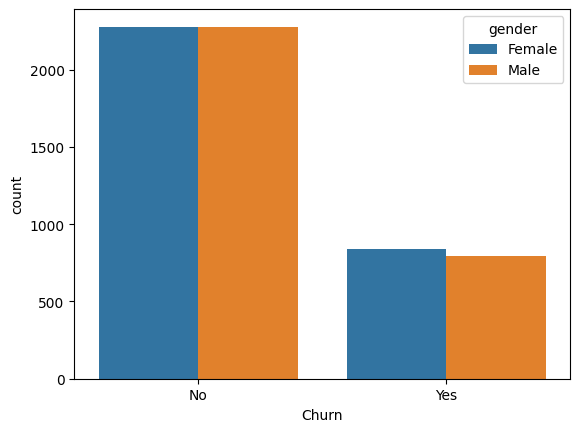

In [ ]:
sns.countplot(data = dataset, x = 'Churn', hue='gender')
plt.show()

## Handle Missing Values

In [ ]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,863
Dependents,863
tenure,774
PhoneService,0
MultipleLines,863
InternetService,863
OnlineSecurity,863


In [ ]:
dataset.isnull().mean()*100

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,12.253301
Dependents,12.253301
tenure,10.989635
PhoneService,0.000000
MultipleLines,12.253301
InternetService,12.253301
OnlineSecurity,12.253301


### Numerical null value handling

In [ ]:
numerical_cols = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print(numerical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


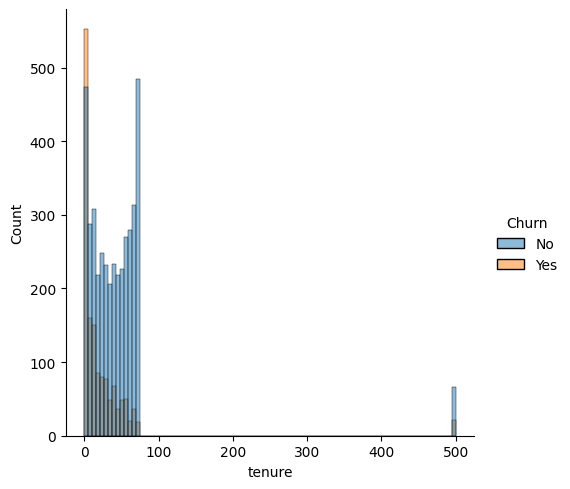

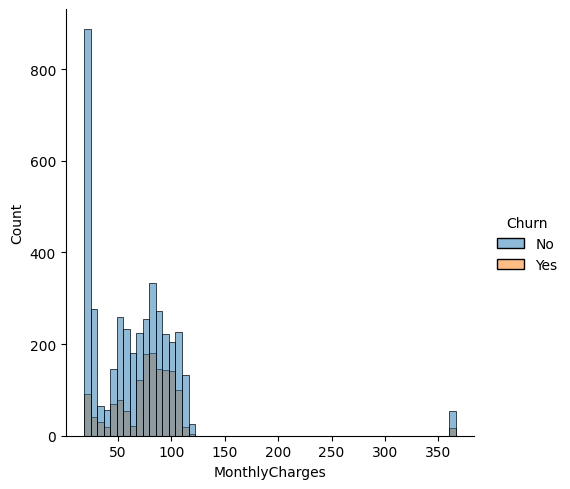

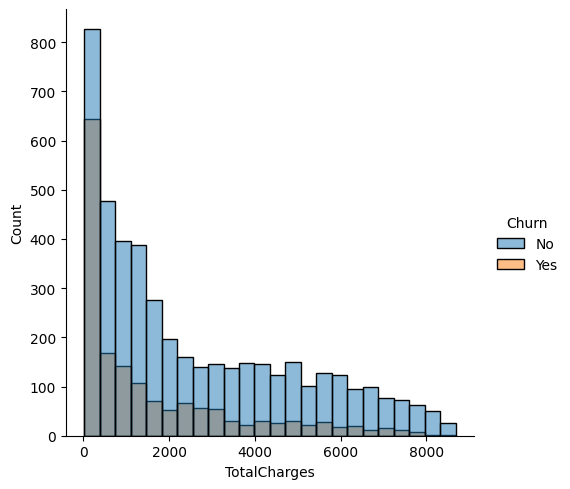

In [ ]:
# checking data distribution with seaborn of numerical columns with null values
for feature in numerical_cols:
  if dataset[feature].isnull().sum() > 0:
    sns.displot(data = dataset, x = dataset[feature], hue = 'Churn')
    plt.show()


In [ ]:
# filling missing values using median data cause data distribution is skewed
for feature in numerical_cols:
  if dataset[feature].isnull().sum() > 0:
    dataset[feature].fillna(dataset[feature].median(), inplace = True)

In [ ]:
dataset[numerical_cols].isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0


### Categorical null values handling

In [ ]:
cat_cols = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
dataset[cat_cols].isnull().sum()

,0
customerID,0
gender,0
Partner,863
Dependents,863
PhoneService,0
MultipleLines,863
InternetService,863
OnlineSecurity,863
OnlineBackup,863
DeviceProtection,0


In [ ]:
# Replacing missing values with mode
for feature in cat_cols:
  if dataset[feature].isnull().sum() > 0:
    dataset[feature].fillna(dataset[feature].mode()[0], inplace = True)

dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Duplicates

In [ ]:
dataset.duplicated().sum()

np.int64(0)

**No duplicate row**

### Handle Outliers

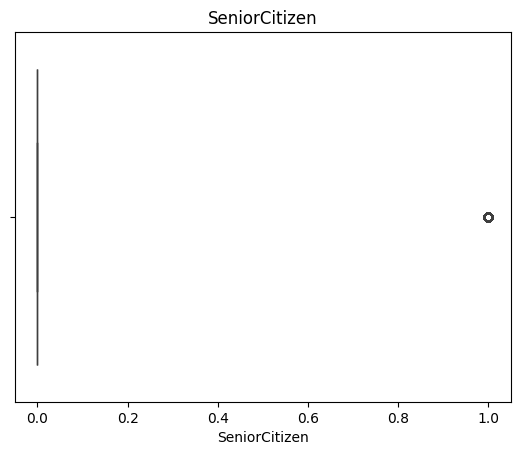

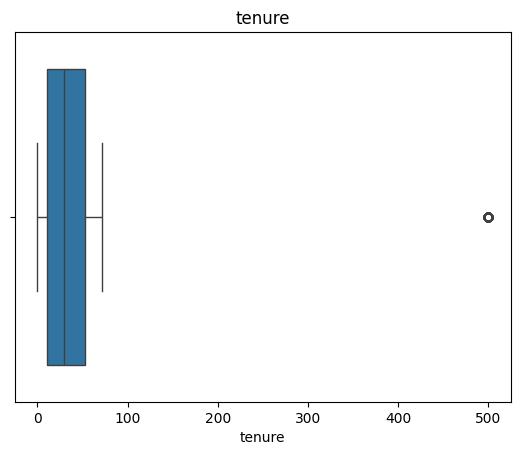

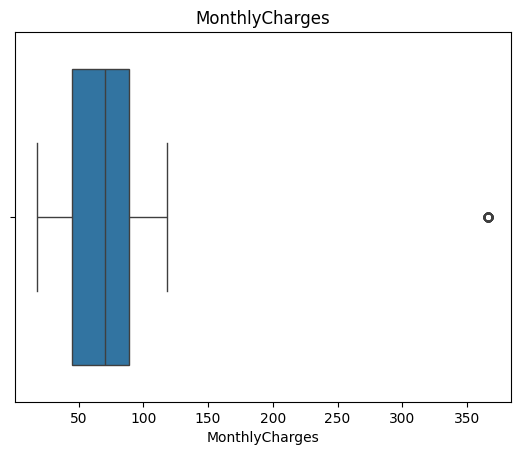

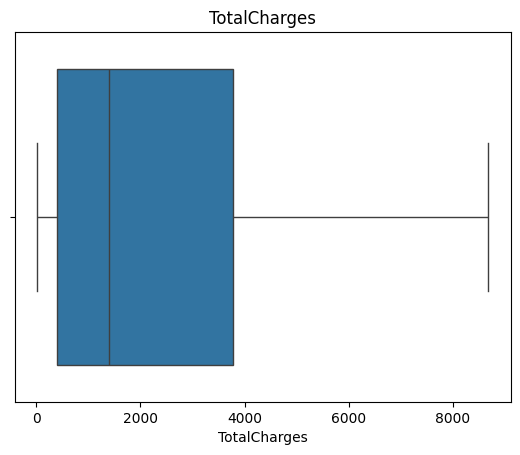

In [ ]:
# box plot for checking outliers in numerical columns
for feature in numerical_cols:
  plt.title(feature)
  sns.boxplot(data = dataset, x = dataset[feature])
  plt.show()

**Two columns have outliers
: 1: tenure, 2: MonthlyCharges**

In [ ]:
dataset.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
# remove outliers of tenure and MonthlyCharges Columns using IQR method
for feature in ['tenure', 'MonthlyCharges']:
  Q1 = dataset[feature].quantile(0.25)
  Q3 = dataset[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  dataset = dataset[(dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)]
  print(dataset.shape)


(6937, 21)
(6860, 21)


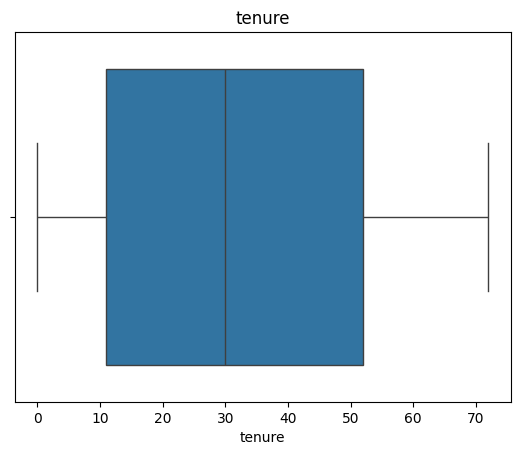

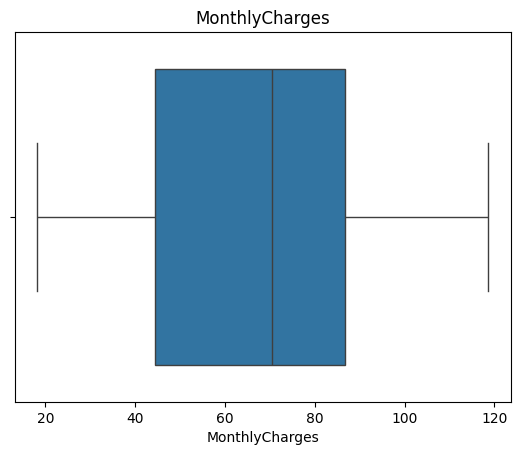

In [ ]:
for feature in ['tenure', 'MonthlyCharges']:
  plt.title(feature)
  sns.boxplot(data = dataset, x = dataset[feature])
  plt.show()

In [ ]:
dataset.shape

(6860, 21)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical columns

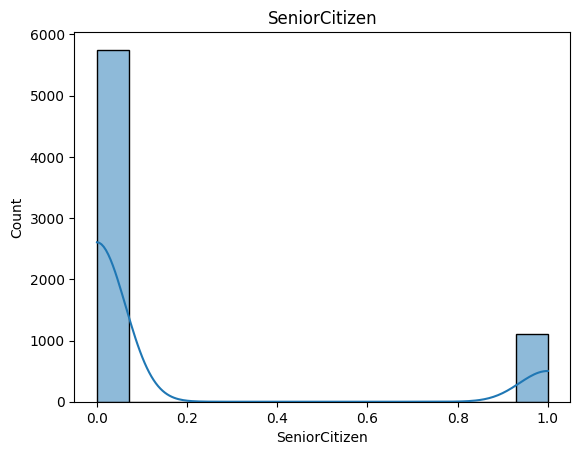

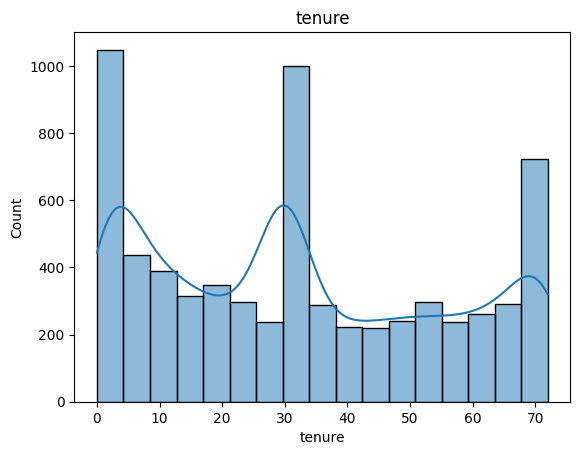

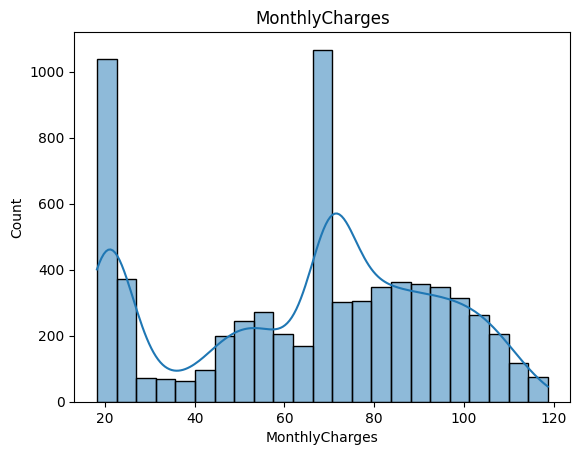

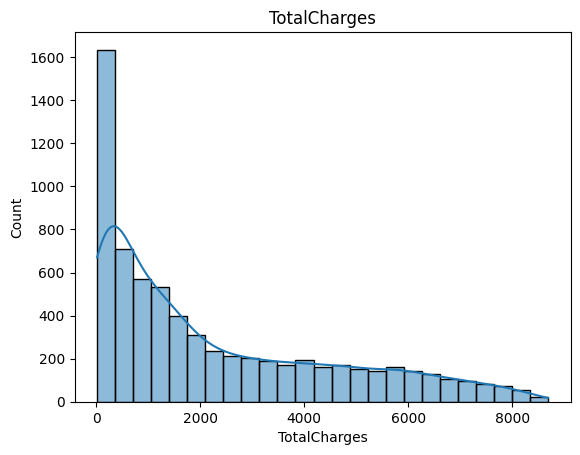

In [ ]:
# Numerical columns analysis
for feature in numerical_cols:
  plt.title(feature)
  sns.histplot(data = dataset, x = dataset[feature], kde = True)
  plt.show()

# Observation:
### tenure: Shape is Bimodal
1. A large number of customers have very short tenures, suggesting early churn or short-term usage is common.

2. One mode at low tenure → New customers

3. One mode at high tenure → Loyal customers


### MonthlyCharges and total Charges: Shape is skewed.
1. When Charges are High → Less Number Of Customer

### Categorical columns

In [ ]:
for i in cat_cols:
  if i == 'customerID':
    continue
  print()

  print(dataset[i].value_counts())


gender
Female    3430
Male      3430
Name: count, dtype: int64

Partner
No     3970
Yes    2890
Name: count, dtype: int64

Dependents
No     5056
Yes    1804
Name: count, dtype: int64

PhoneService
Yes    6198
No      662
Name: count, dtype: int64

MultipleLines
No                  3735
Yes                 2547
No phone service     578
Name: count, dtype: int64

InternetService
Fiber optic    3471
DSL            2077
No             1312
Name: count, dtype: int64

OnlineSecurity
No                     3838
Yes                    1729
No internet service    1293
Name: count, dtype: int64

OnlineBackup
No                     3489
Yes                    2067
No internet service    1304
Name: count, dtype: int64

DeviceProtection
No                     3013
Yes                    2358
No internet service    1489
Name: count, dtype: int64

TechSupport
No                     3821
Yes                    1745
No internet service    1294
Name: count, dtype: int64

StreamingTV
No                

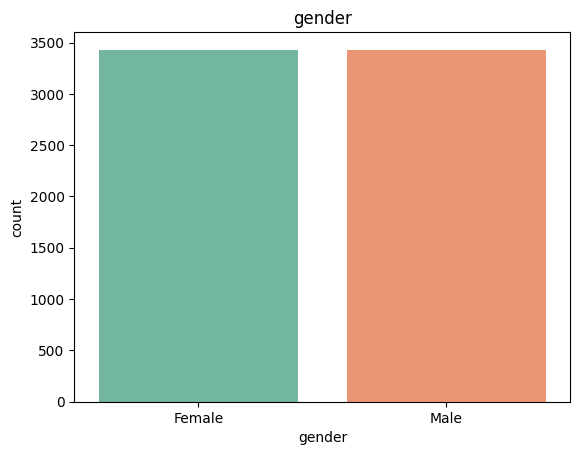

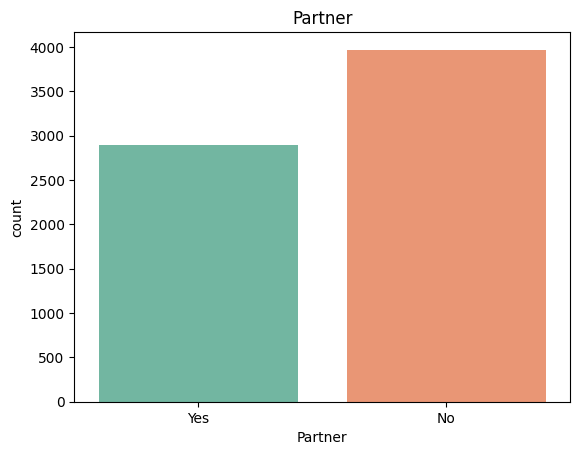

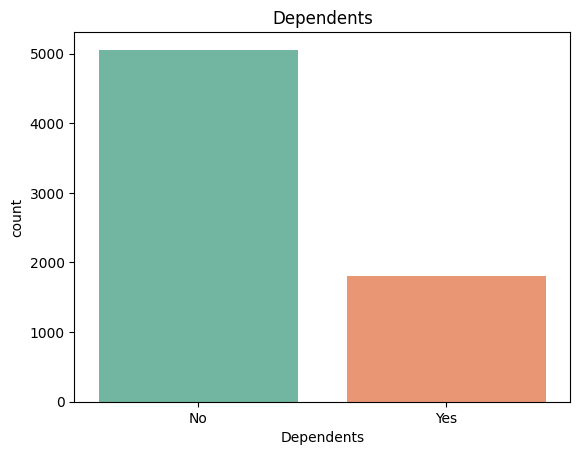

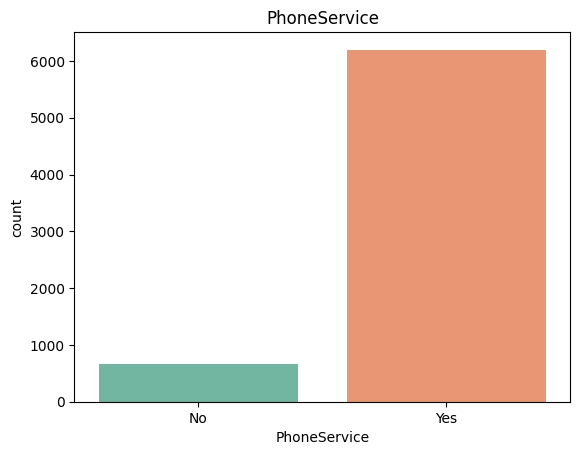

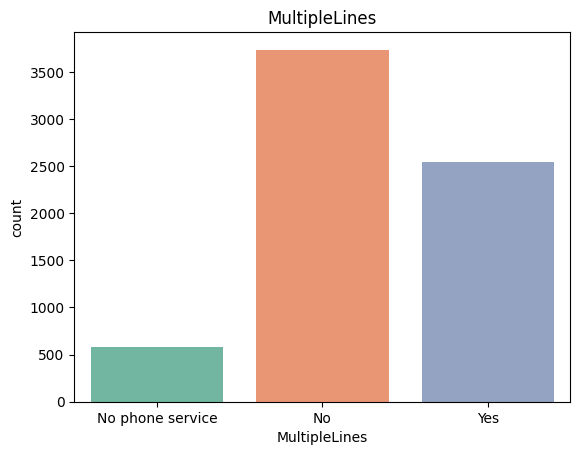

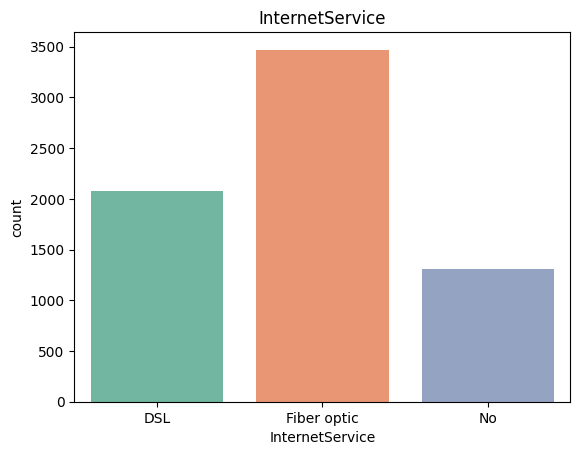

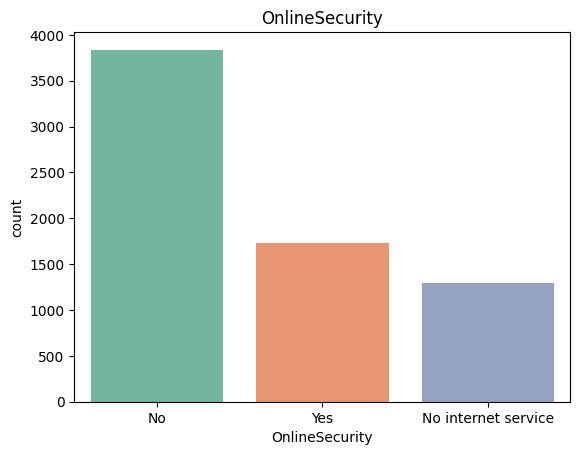

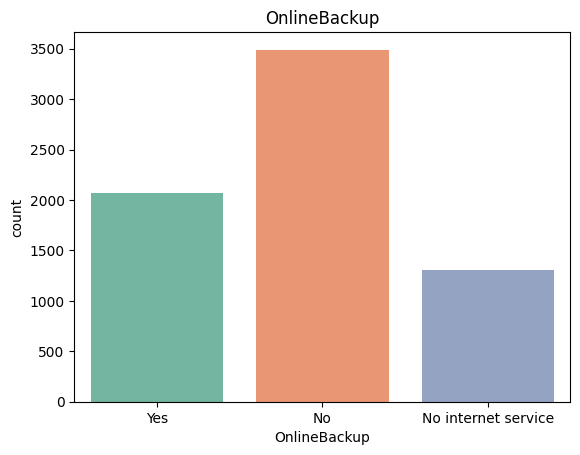

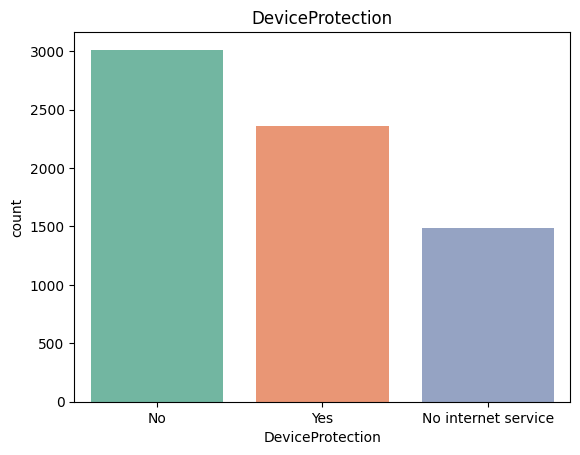

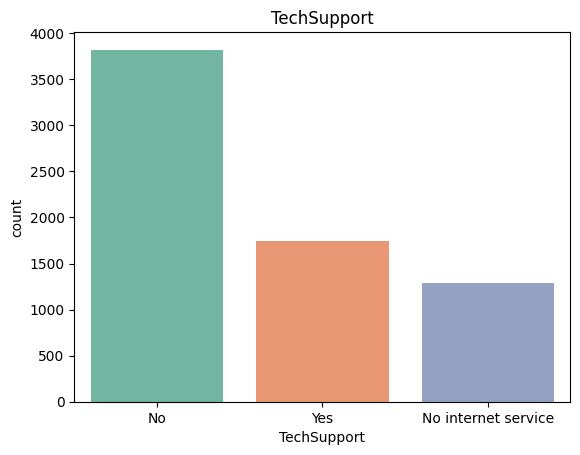

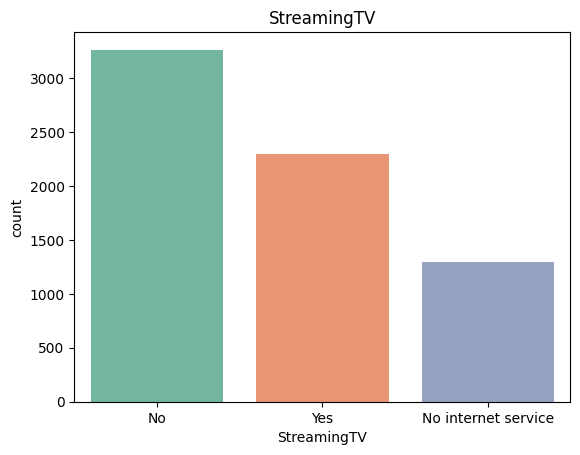

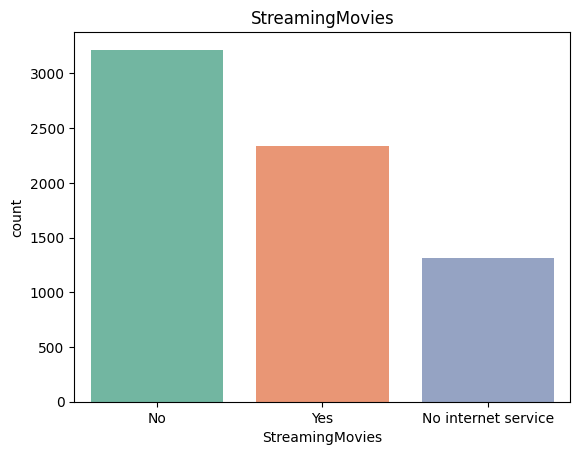

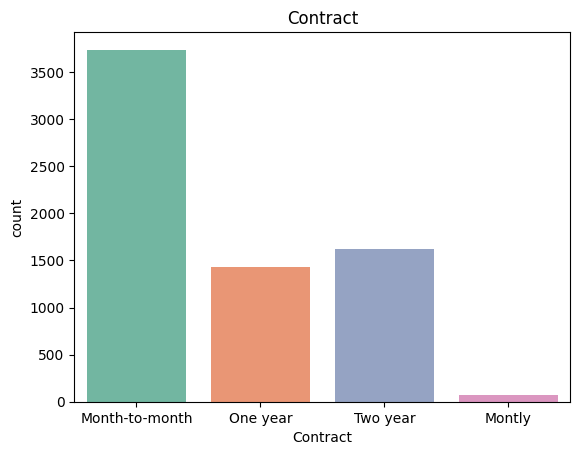

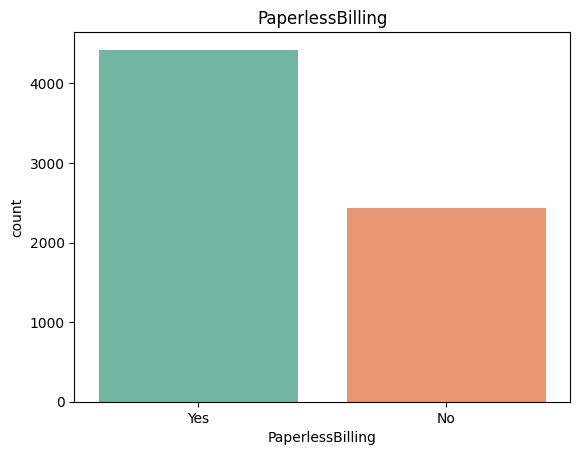

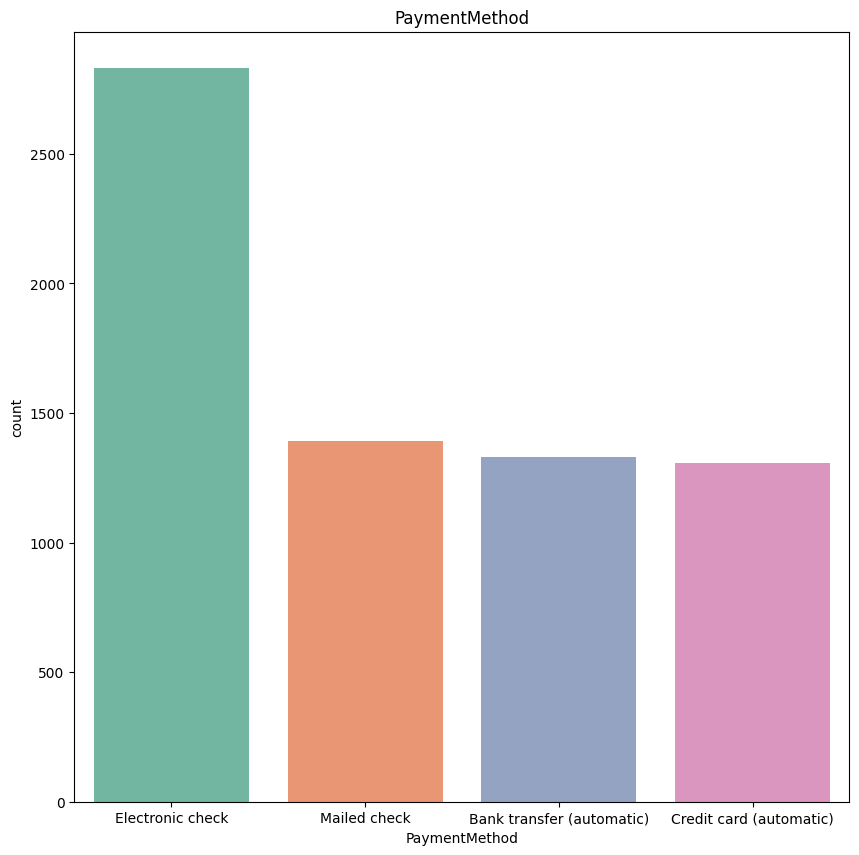

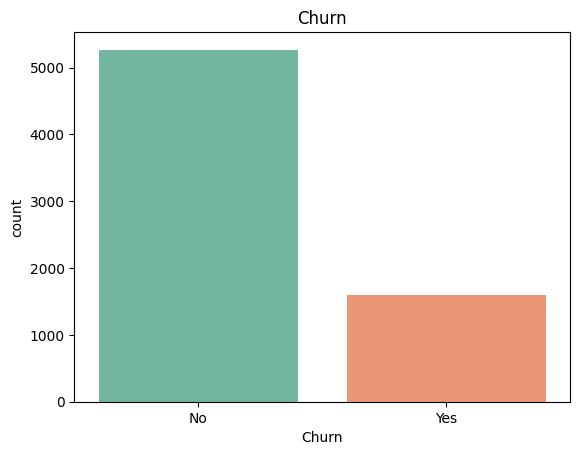

In [ ]:
# checking the data distribution of Categorical columns

for feature in cat_cols:
  if feature == 'customerID':
    continue
  if feature == 'PaymentMethod':
    plt.figure(figsize = (10,10))
  plt.title(feature)
  sns.countplot(data = dataset, x = feature, palette='Set2')
  plt.show()

## Bivariate Analysis

#### tenure column

In [ ]:
'''
'tenure' column is say how old a customer is.
 we will see the total customer over different time in months
 '''
df = dataset.copy()
# Define bins and labels
bins = [0, 6, 24, 48, 72]
labels = ['New (0-6)', 'Short-Term (6-24)', 'Mid-Term (24-48)', 'Long-Term (48-72)']

# Apply binning
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Optional: check result
print(df['tenure_group'].value_counts())


tenure_group
Mid-Term (24-48)     2165
Long-Term (48-72)    1934
Short-Term (6-24)    1497
New (0-6)            1264
Name: count, dtype: int64


In [ ]:
df.shape

(6860, 22)

In [ ]:
df.shape

(6860, 22)

**Checking 'tenure' column relationship with targer variable 'Churn'**

<Axes: xlabel='tenure_group', ylabel='count'>

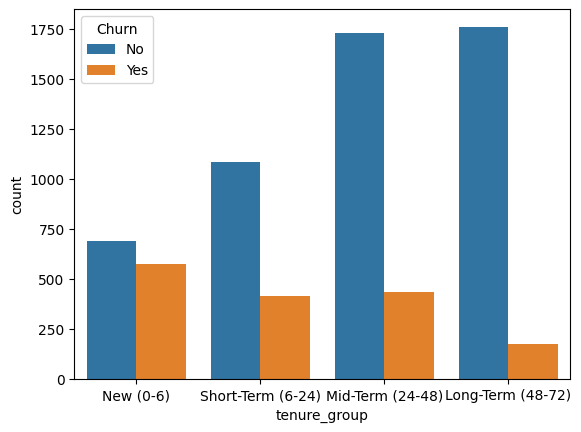

In [ ]:
sns.countplot(x='tenure_group', hue='Churn', data=df)

# Observarion:
**Newly added Customer have highest tendency of Churn(not continue with the company service) from this telco company.
Time range 0 to 6 months of taking services.**

#### **MonthlyCharges** Column

In [ ]:
bins = [0, 25, 50, 100, 125]
labels = ['very Low (0-25)', 'Low (25-50)', 'Mid-Range (50-100)', 'High (100-125)']

# creating new columns
df['MonthlyCharges_Range'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

# checking Results
print(df['MonthlyCharges_Range'].value_counts())


MonthlyCharges_Range
Mid-Range (50-100)    4075
very Low (0-25)       1228
Low (25-50)            783
High (100-125)         774
Name: count, dtype: int64


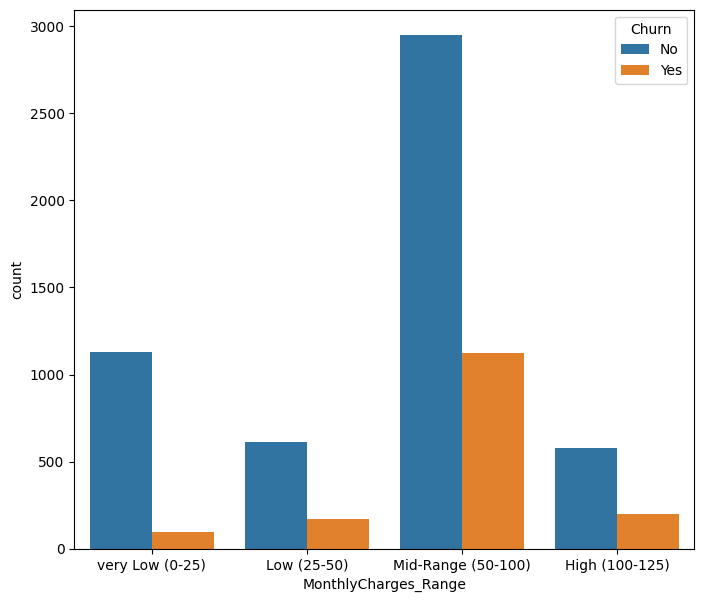

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(x='MonthlyCharges_Range', hue='Churn', data=df)
plt.show()

# Observation:
**From range 50 to 100 dollars monthly charged people is higest and have most tendency to Stay in company services.**

#### Contract Column vs Churn(target)

In [ ]:
df.Contract.value_counts().index

Index(['Month-to-month', 'Two year', 'One year', 'Montly'], dtype='object', name='Contract')

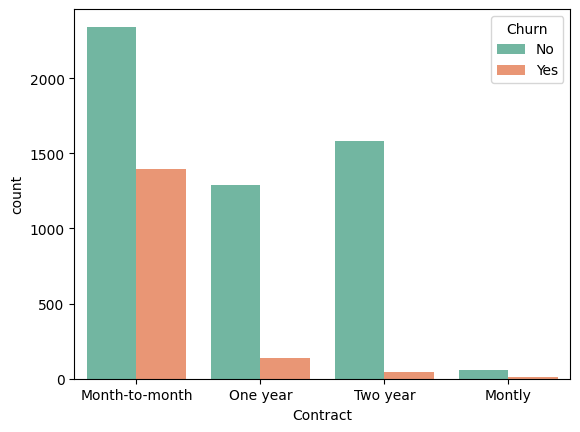

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.show()


# Observation:
Month to month contracts are not stable for this bussiness. But also here is higest number of customer have month to month contract.

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,No,No,Yes,No,No,No,One year,No,Mailed check,70.50,1889.50,No
2,3668-QPYBK,Female,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,No


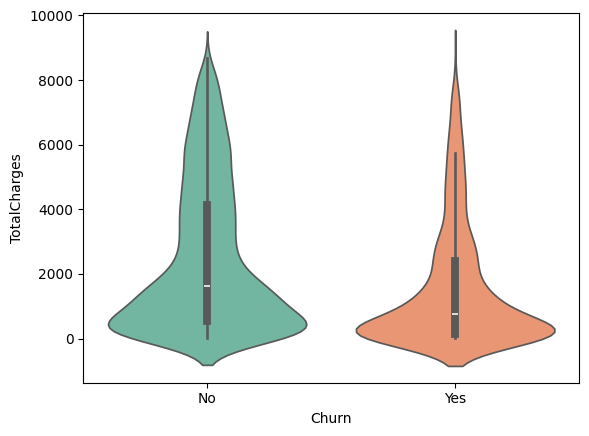

In [ ]:
sns.violinplot(data = dataset, x = 'Churn', y = 'TotalCharges', palette='Set2')
plt.show()

# Observation:
1. Customers who churned generally have lower TotalCharges, indicating they often leave early in their subscription.
2. Non-churned customers tend to have higher TotalCharges, suggesting longer-term engagement and retention.

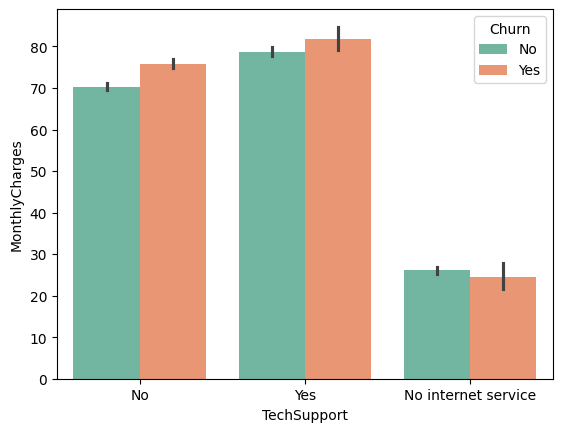

In [ ]:
sns.barplot(x='TechSupport', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')
plt.show()

# Observation:
1.  Those who take TechSuppor they have higher MontlyCharges and they have more tendency for Churn
2.  Absence of TechSupport + high charges = increased churn risk.

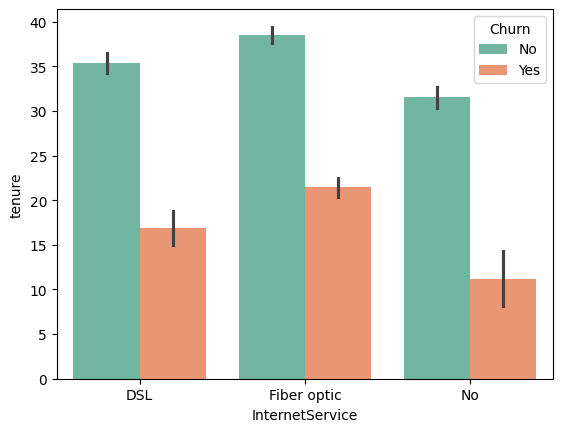

In [ ]:
sns.barplot(x='InternetService', y='tenure', hue='Churn', data=df, palette='Set2')
plt.show()

# Observation:
1. Having Fiber optic internet service + mid range tenure = increased churn risk

## How is the relationship between tenure and MonthlyCharges?

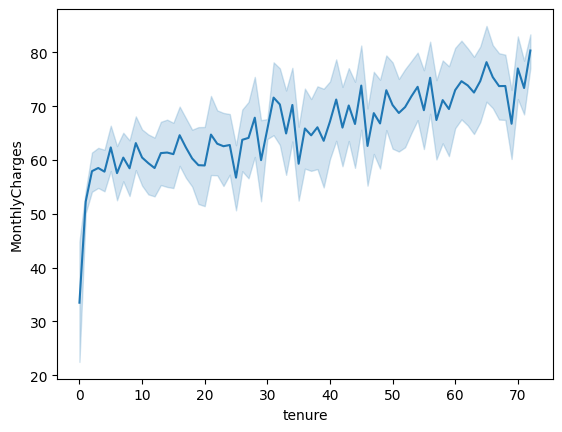

In [ ]:
sns.lineplot(x='tenure', y='MonthlyCharges', data=df, palette='Set2')
plt.show()

## Observation:
when Customers tunure(relationship time) is increased then MonthlyCharges are also increased.

##  How many people take PhoneService but Churned(yes)?

In [ ]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6198
No,662


In [ ]:
df[(df['PhoneService'] == 'Yes') & (df['Churn'] == 'Yes')].groupby(['PhoneService','Churn']).size().reset_index()

,PhoneService,Churn,0
0,Yes,Yes,1448


## How does the MultipleLines affect customer churn?

In [ ]:
df.groupby(['MultipleLines','Churn']).size().reset_index().rename(columns={0:'count'})

,MultipleLines,Churn,count
0,No,No,2911
1,No,Yes,824
2,No phone service,No,452
3,No phone service,Yes,126
4,Yes,No,1906
5,Yes,Yes,641


# Observation:
1. Customers with "No" MultipleLines have the highest retention, with 2911 not churning.

2. Churn is relatively higher among those with "Yes" MultipleLines, with 641 churning compared to 1906 staying.

# **Final Observation**
 Most Important Features
1. **Contract**: Reflects commitment level, with month-to-month contracts correlating with higher churn risk due to flexibility in leaving.
2. **tenure**: Captures customer loyalty; longer tenure often reduces churn probability.
3. **MonthlyCharges**: Indicates cost sensitivity, a key driver of churn when charges are perceived as too high.

# Feature Engineering


In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,No,No,Yes,No,No,No,One year,No,Mailed check,70.50,1889.50,No
2,3668-QPYBK,Female,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,No


In [ ]:
# Droping customerID Columns
dataset.drop('customerID', axis = 1, inplace = True)
dataset.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


### Feature Transformation:


#### Categorical to numerical

Churn:
No = 0,
Yes = 1

In [ ]:
# categorical to numerical uisng labelEncoder
cat_cols = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

le = LabelEncoder()
for feature in cat_cols:
  dataset[feature] = le.fit_transform(dataset[feature])

In [ ]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,0,0,2,0,0,0,2,0,3,70.50,1889.50,0
2,0,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


# Feature Constraction


In [ ]:
# creating New column: AvgMonthlyCharges
dataset['AvgMonthlyCharges'] = dataset['TotalCharges']/dataset['tenure']

In [ ]:
# Replace infinity with 0
dataset.replace([np.inf, -np.inf], 0, inplace=True)


In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,29.850000
1,1,0,0,0,34.0,1,0,0,0,0,2,0,0,0,2,0,3,70.50,1889.50,0,55.573529
2,0,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,54.075000
3,1,0,0,0,45.0,0,1,1,2,0,2,2,0,0,2,0,0,42.30,1840.75,0,40.905556
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0,75.825000


# Feature Scalling


In [ ]:
# scalling

scaler = MinMaxScaler()
#cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']

for i in dataset.columns:
  dataset[i] = scaler.fit_transform(dataset[[i]])


In [ ]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,29.850000
1,1,0,0,0,34.0,1,0,0,0,0,2,0,0,0,2,0,3,70.50,1889.50,0,55.573529
2,0,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,54.075000


# Correlation

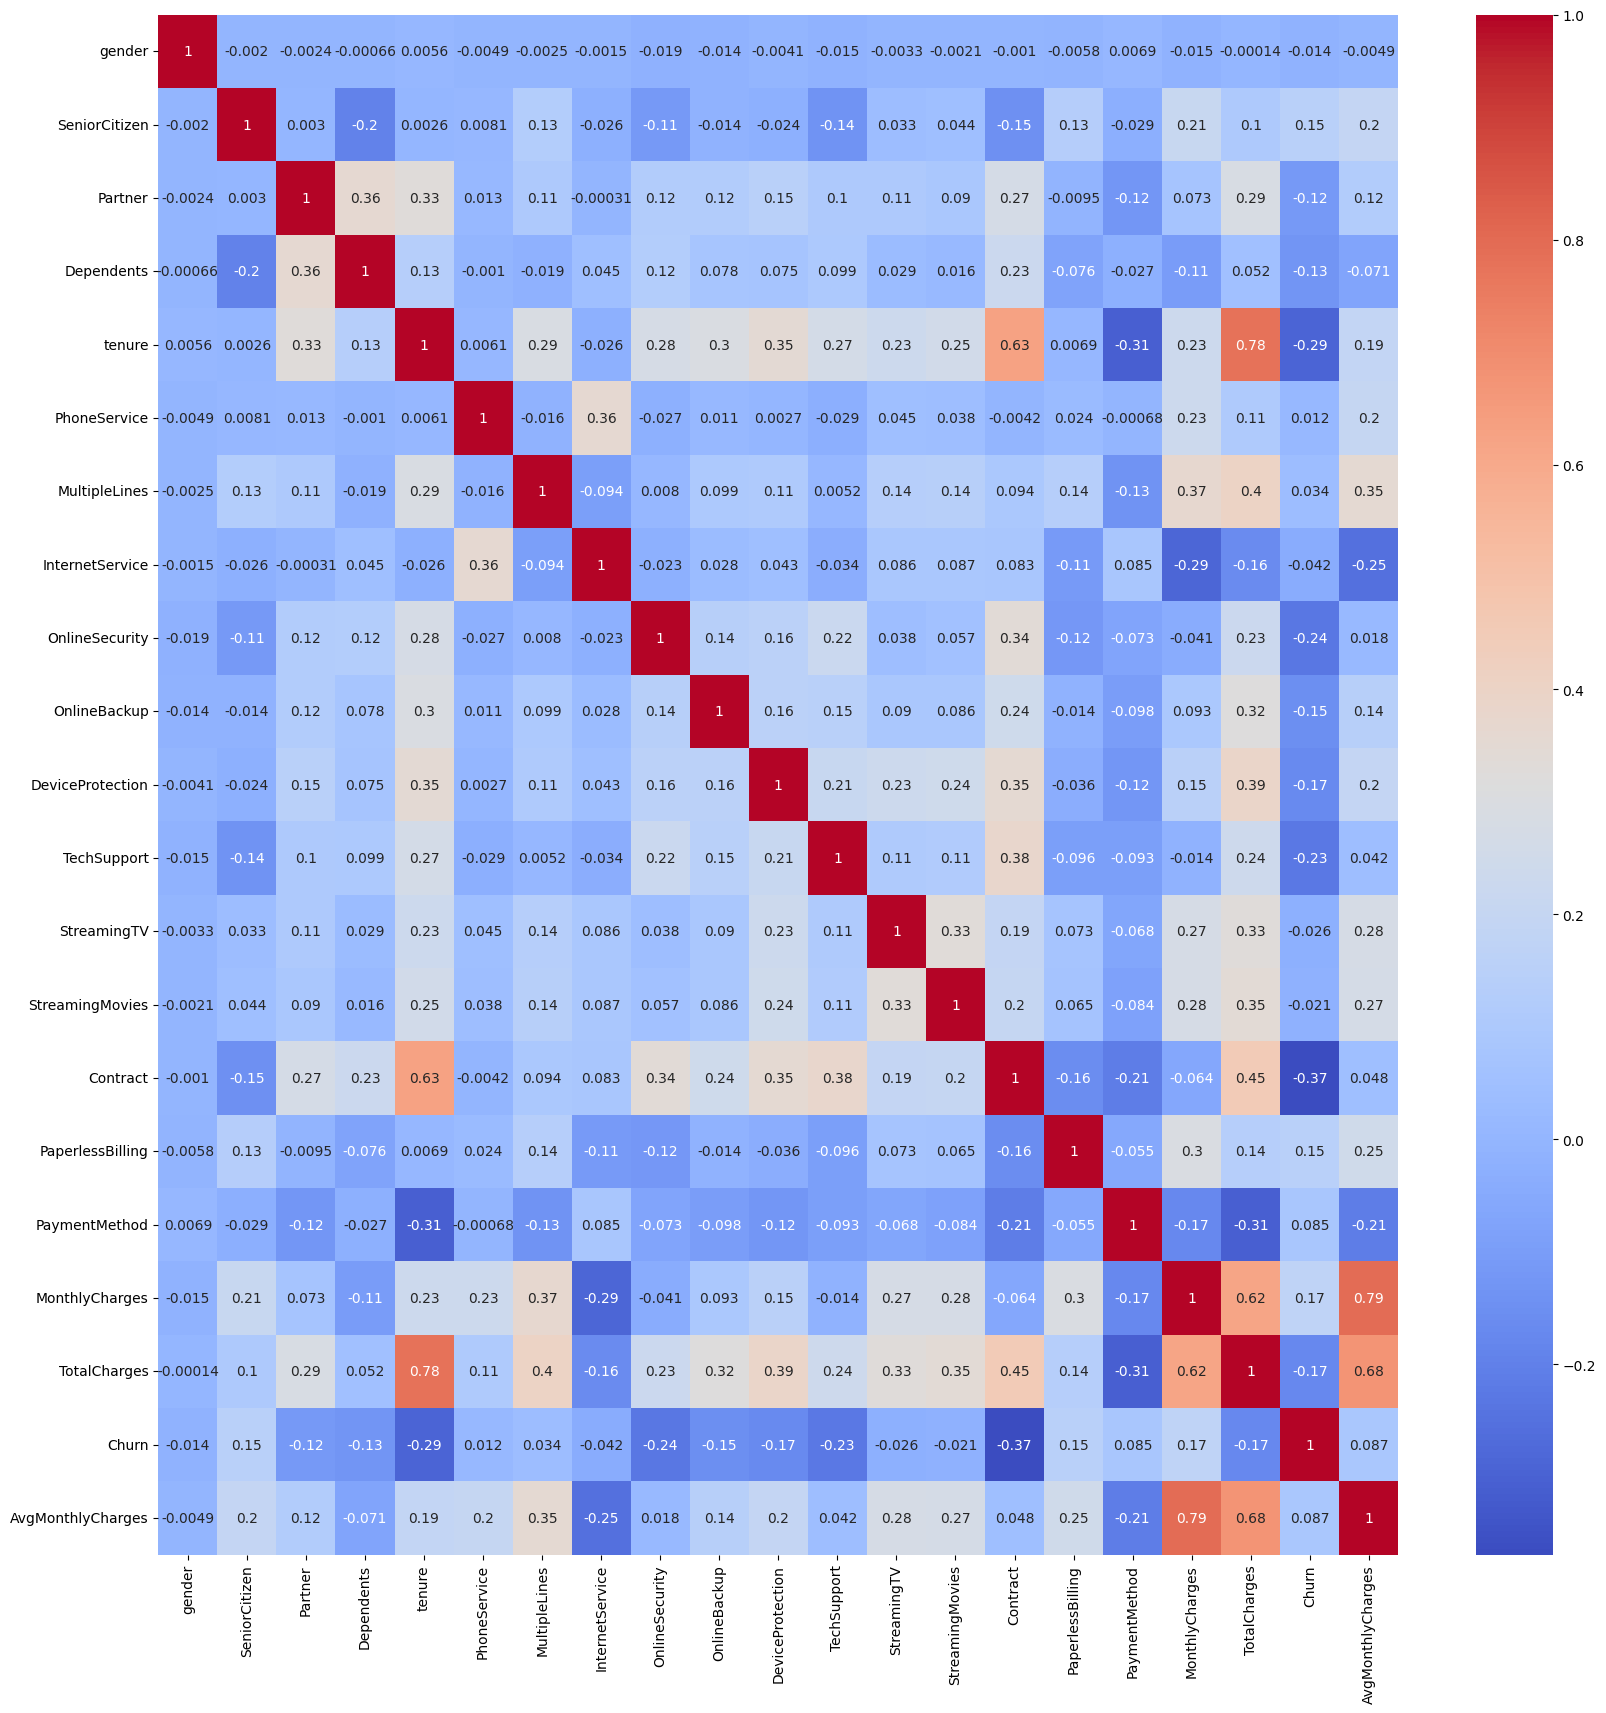

In [ ]:
# seeing the Relationship between all columns uisng correlation and heatmap

plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Feature Selection

In [ ]:
# Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2, f_classif

y = dataset['Churn']
X = dataset.drop('Churn', axis = 1, inplace = False)

new_df = SelectKBest(score_func=f_classif, k=11)
new_df.fit(X, y)

new_df = pd.DataFrame(new_df.scores_,index = X.columns ,columns=['Score'])
new_df.sort_values(by = 'Score', ascending = False)

,Score
Contract,1082.444757
tenure,640.614230
OnlineSecurity,401.952651
TechSupport,369.659495
TotalCharges,214.920208
MonthlyCharges,207.450360
DeviceProtection,196.510212
OnlineBackup,160.298484
SeniorCitizen,149.714655
PaperlessBilling,147.700428


In [ ]:
# select columns with score 49
selected_cols = new_df[new_df['Score'] > 49].index
selected_cols

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'AvgMonthlyCharges'],
      dtype='object')

#### Independent and target column.

In [ ]:
X = dataset[selected_cols]
y = dataset['Churn']

In [ ]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlyCharges
0,0,1,0,0.013889,0,2,0,0,0,1,2,0.115538,0.001275,0.105749
1,0,0,0,0.472222,0,0,2,0,2,0,3,0.520418,0.215867,0.196878
2,0,0,0,0.027778,2,2,0,0,0,1,3,0.354582,0.010310,0.191570
3,0,0,0,0.625000,2,0,2,2,2,0,0,0.239542,0.210241,0.144915
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.522410,0.015330,0.268623


# Model Building


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 82)

In [ ]:
X_train.head(5)

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
4505,0.416667,1,1,3,0.077191,0.202769
77,0.111111,2,0,0,0.362550,0.053479
6917,1.000000,2,0,3,0.655378,0.696221
2951,0.277778,2,2,2,0.520418,0.144894
4088,0.097222,0,0,0,0.551295,0.057835


### Train data class balacing

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [ ]:
X_resampled.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
0,0.416667,1,1,3,0.077191,0.202769
1,0.111111,2,0,0,0.362550,0.053479
2,1.000000,2,0,3,0.655378,0.696221
3,0.277778,2,2,2,0.520418,0.144894
4,0.097222,0,0,0,0.551295,0.057835


In [ ]:
# Model Training

# Define models with names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC(probability=True)),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ("LightGBM", LGBMClassifier())
]

# Train and store models
trained_models = []
for name, model in models:
    model.fit(X_resampled, y_resampled)
    trained_models.append((name, model))


print(trained_models)

[LightGBM] [Info] Number of positive: 3683, number of negative: 3683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 7366, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[('Logistic Regression', LogisticRegression(max_iter=1000)), ('K-Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine', SVC(probability=True)), ('Naive Bayes', GaussianNB()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
      

In [ ]:
for name, model in trained_models:
    print(f"{name} Accuracy: {model.score(X_test, y_test):.2f}")


Logistic Regression Accuracy: 0.71
K-Nearest Neighbors Accuracy: 0.68
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.74
Support Vector Machine Accuracy: 0.68
Naive Bayes Accuracy: 0.70
XGBoost Accuracy: 0.74
LightGBM Accuracy: 0.75


In [ ]:
y_resampled.value_counts()

,count
Churn,
0,3683
1,3683


In [ ]:
from sklearn.model_selection import GridSearchCV

#params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_resampled, y_resampled)
print("Best Accuracy:", grid.best_score_)


IndentationError: unexpected indent (<ipython-input-297-f87f54349519>, line 4)